### Jupyterlab magic
Spodnja celica uvozi vse knjižnice (mogoče tudi kakšno preveč) in pripravi nastavitve, ki jih potrebujemo kasneje za računanje in risanje. Poženi pred čemerkoli drugim

Dober vir informacij za avdio v pythonu: https://musicinformationretrieval.com/ipython_audio.html

In [130]:
import IPython.display as ipd
from math import pi
from numpy import *
from scipy.stats import norm
from scipy.constants import *
from scipy.io import wavfile
import scipy.linalg as s_linalg
from ipywidgets import *
from matplotlib import pyplot as plt
from matplotlib import rcParams as MpRcParams
MpRcParams['mathtext.fontset'] = 'cm'
MpRcParams['mathtext.rm'] = 'serif'
MpRcParams['mathtext.rm'] = 'serif'
%matplotlib inline

# DPCM z enostavnim prediktorjem 1. reda, s koeficientom $a_1=1$

<ipython-input-156-05fc9b876243>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, x = wavfile.read('PrimerGovora15-22k.wav')


23198

6936

2746

324

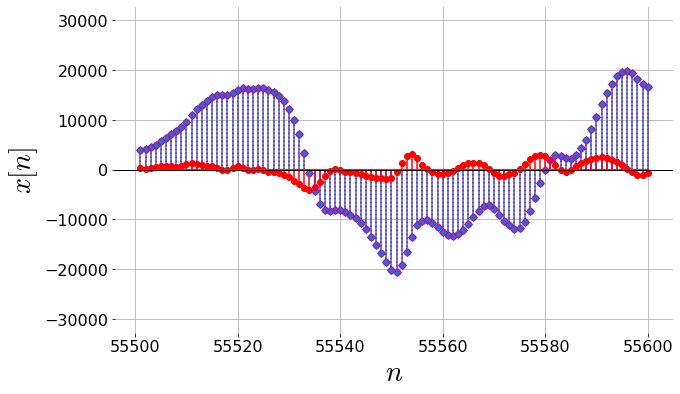

In [156]:
N=1   #red prediktorja
#samplerate, data = wavfile.read('sample44100.wav')
#x=data[:,0]
#x=hstack((int16(zeros(N)),x))     #vhodenmu signalu dodamo toliko 0, kolikor je red prediktorja, da lahko začne prediktor prav delovati preden se signal zares začne
#start=98405
#Nplt=50
samplerate, x = wavfile.read('PrimerGovora15-22k.wav')
x=hstack((int16(zeros(N)),x))     #vhodenmu signalu dodamo toliko 0, kolikor je red prediktorja, da lahko začne prediktor prav delovati preden se signal zares začne
x=x*2**15
start=55500+N
Nplt=100

d=zeros(size(x))
for n in range(1,size(x)):
    d[n]=x[n]-x[n-1]

#pošiljamo signal razlike d (DPCM) in dekodiramo v y (PCM obliko), ki mora biti enak x
y=zeros(size(x))
for n in range(1,size(x)):
    y[n]=y[n-1]+d[n]

n=arange(start,start+Nplt)
#Risanje
fig, ax= plt.subplots(figsize=(10,6))
ax.stem(n,x[start:start+Nplt])
ax.stem(n,d[start:start+Nplt],'r',markerfmt='ro')
markerline, stemlines, baseline = ax.stem(n,y[start:start+Nplt],'m:',markerfmt='mD')
markerline.set_markerfacecolor('none')
ax.axhline(0, color='black', lw=1)
ax.set_ylim(-2**15,2**15)
plt.ylabel(r'$x[n]$', fontsize=28)
plt.xlabel(r'$n$', fontsize=28)
plt.grid(which="both")
ax.set_frame_on(False)
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16) 

display(round(max(absolute(x))))
display(round(max(absolute(d))))
display(round(std(x)))
display(round(std(d)))
ipd.Audio(y,rate=samplerate)

# Slike za PPT

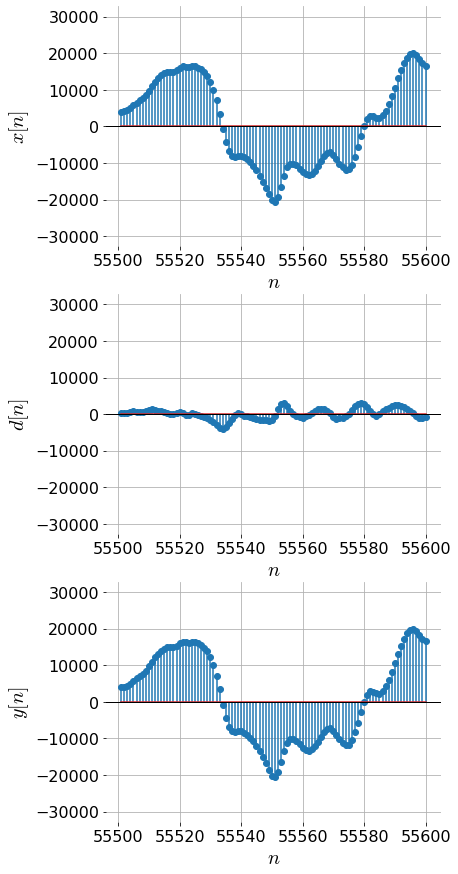

In [154]:
#Risanje
fig, ax= plt.subplots(3,1,figsize=(6,15))
ax[0].stem(n,x[start:start+Nplt])
ax[0].set_ylabel(r'$x[n]$', fontsize=20)
ax[1].stem(n,d[start:start+Nplt])
ax[1].set_ylabel(r'$d[n]$', fontsize=20)
ax[2].stem(n,y[start:start+Nplt])
ax[2].set_ylabel(r'$y[n]$', fontsize=20)
for i in range(0,3):
    ax[i].axhline(0, color='black', lw=1)
    ax[i].set_ylim(-2**15,2**15)
    ax[i].set_xlabel(r'$n$', fontsize=20)
    ax[i].grid(which="both")
    ax[i].set_frame_on(False)
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16) 

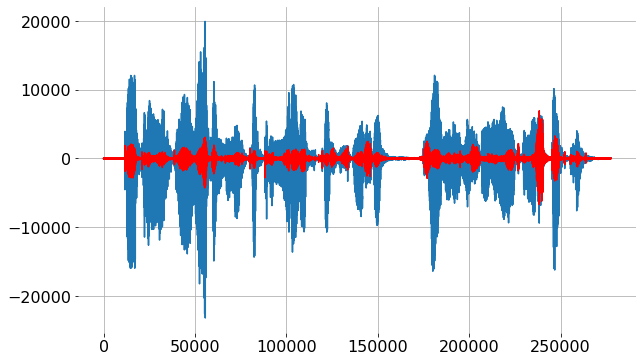

In [153]:
#Risanje
fig, ax= plt.subplots(figsize=(10,6))
ax.plot(x)
ax.plot(d,'r')
ax.set_frame_on(False)
ax.grid(which="both")